Implementation of a simple MLP for the MNIST digit classification problem


Libraries used:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\DUSHUMUN\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Importing the Data and splitting into train and test (data set comes with predetermined train test ratio 60,000/10,000)

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

feature values split for each sample, 60k training and 10k testing samples in total, each containing 784 features (one feature for each pixel in the 28x28 image. Pixel intensity values have also been normalised (range of 0-255 rescaled between 0 and 1.)

In [3]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

Y values stating the sample class is translated into a binary class matrices, allowing for framing of classification problem

In [4]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

Next the network architecture is defined, consisting of two hidden layers and a softmax output layer. Dropout regularsation has been moderately applied after each fully connected layer in order to prevent overfitting through training.

In [5]:
opt = SGD(lr = 0.001, momentum = 0.9)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #fully connected layer
model.add(Dropout(0.2))       
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) #output classification layer

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy', 'top_k_categorical_accuracy'])


now the model has been defined, training can begin. Training will consist of 10 epochs, using a batch size of 32 images

In [6]:
batch_size = 32
epochs = 10


In [7]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.6644 - acc: 0.8172 - top_k_categorical_accuracy: 0.9731 - val_loss: 0.2981 - val_acc: 0.9163 - val_top_k_categorical_accuracy: 0.9945
Epoch 2/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.3144 - acc: 0.9085 - top_k_categorical_accuracy: 0.9948 - val_loss: 0.2386 - val_acc: 0.9316 - val_top_k_categorical_accuracy: 0.9959
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2547 - acc: 0.9255 - top_k_categorical_accuracy: 0.9964 - val_loss: 0.1943 - val_acc: 0.9445 - val_top_k_categorical_accuracy: 0.9968
Epoch 4/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.2141 - acc: 0.9387 - top_k_categorical_accuracy: 0.9971 - val_loss: 0.1660 - val_acc: 0.9505 - val_top_k_categorical_accuracy: 0.9978
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0

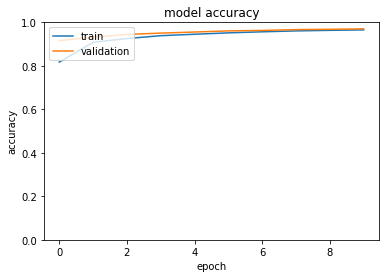

Test accuracy
0.9702


In [8]:
plt.ylim(0,1)
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test accuracy')
print(score[1])

With just 10 epochs with a simple MLP, high levels of classification accuracy have been achieved (97.05%)

Analysis of model

In [9]:
y_test_softmax = model.predict(x_test)
Y_test_pred = np.argmax(y_test_softmax, axis = 1)

In [10]:
labels = [0,1,2,3,4,5,6,7,8,9]

print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_test_pred, labels = labels))

Confusion Matrix
[[ 967    0    1    1    0    4    4    1    2    0]
 [   0 1122    3    2    0    1    4    0    3    0]
 [   7    2  996    6    4    1    2    6    7    1]
 [   0    0    4  986    0    6    0    7    4    3]
 [   1    0    4    0  956    0    4    1    2   14]
 [   4    0    0   10    2  860    9    1    4    2]
 [   6    3    0    0    7    9  930    1    2    0]
 [   1   10   11    4    2    0    0  987    0   13]
 [   4    2    2    9    4    7    5    4  934    3]
 [   4    7    1   10   12    3    1    6    1  964]]


In [11]:
target_names = ['0','1','2', '3', '4', '5', '6' ,'7' ,'8' ,'9']
print(classification_report(Y_test, Y_test_pred, target_names = target_names))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.98      0.99      0.98      1135
          2       0.97      0.97      0.97      1032
          3       0.96      0.98      0.97      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.96      0.96       892
          6       0.97      0.97      0.97       958
          7       0.97      0.96      0.97      1028
          8       0.97      0.96      0.97       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000

